here we check whether the probability of a subset of $M$ elements sampled from the multiset $\bigcup_{w=1}^n \{p^w (1-p)^{n-w}\}^{_n C_w}$ concentrates. This represents whether there is concentration in the probability of a size-$M$ subset constructed by sampling bitstrings without replacement, according to a chosen bernoulli error model.

In [2]:
from mldec.utils.bit_tools import binarr
from math import comb

In [6]:
import random

def sample_without_replacement(counts, m):
    """
    counts: list of nonnegative integers, where counts[i] is 
            how many balls are labeled i
    m: how many balls to sample (m <= sum(counts))

    Returns a list of m labels, chosen without replacement.
    """
    counts = list(counts)          # copy to avoid mutating the original
    total = sum(counts)
    samples = []

    for _ in range(m):
        # pick a random integer between 1 and total inclusive
        r = random.randint(1, total)
        # find which label r corresponds to
        csum = 0
        for i, c in enumerate(counts):
            csum += c
            if r <= csum:
                samples.append(i)
                counts[i] -= 1
                total -= 1
                break
    return samples

In [30]:

def probability_of_m_subset_no_replacement(n, p, m):
    """
    n: number of elements in the set
    p: probability of selecting an element
    m: number of elements to sample

    Returns the probability of sampling exactly m elements
    from the set, without replacement.
    """
    weights = [comb(n, w) for w in range(1, n+1)]
     # we do not have a chance of sampling the identity for technical reasons
    weights = [0] + weights
    draws = sample_without_replacement(weights, m)
    counts = Counter(draws)
    subset_prob = 0
    for k, v in counts.items():
        subset_prob += (1-p)**(n-k) * p**k * v
    return subset_prob


In [39]:

# initial histogram
n = 6
k = 1
m = 2 ** (n - k)
p = 0.05
trials = 10000
res = []
for _ in range(trials):
    res.append(probability_of_m_subset_no_replacement(n, p, m))

(array([  95.,  610.,  190., 2370., 1555., 1666., 2452.,  163.,  765.,
         134.]),
 array([0.00928597, 0.03388969, 0.05849341, 0.08309713, 0.10770086,
        0.13230458, 0.1569083 , 0.18151202, 0.20611574, 0.23071947,
        0.25532319]),
 <BarContainer object of 10 artists>)

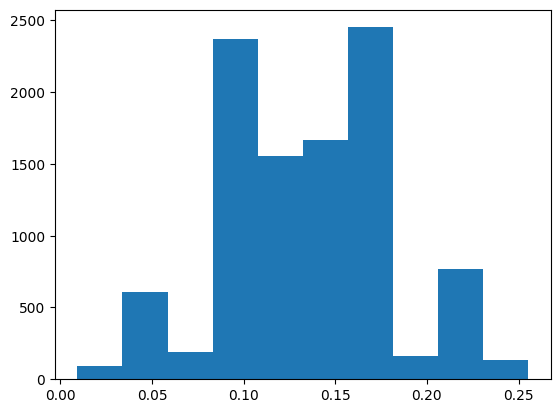

In [40]:
import matplotlib.pyplot as plt
plt.hist(res)